Assignment 1 of Hanson

Legal Name Hanxiang Zhang
Stu # 300100018

To load all images, I generated a list of paths to the image files by reading the directory and file structure using the os package in python.

To organize the images, I used if-else statements to place images of different labels together.

There are 225 files in total.
For binary classification, there are 135 uni files, 90 nonuni files.
For multi classification, there are 60 underexposed, 60 overexposed, 105 regular files.

In [15]:
import os
import numpy as np
root_path = 'C:\\Users\\Hansonchang\\OneDrive\\Grad\\CNN in CV\\Phos2_0_2MP\\'

all_files = []
for root, dirs, files in os.walk(root_path):
    for file in files:
        if '.png' in file:
            all_files.append(os.path.join(root, file))

#Organize image files for binary classification
uni_file = []
nonuni_file = []
for f in all_files:
    #print(f)
    if "_uni_" in f:
        uni_file.append(f)
    else:
        nonuni_file.append(f)

#Organize image files for multi classification
unde_file = []
over_file = []
regu_file = []
for f in all_files:
    #print(f)
    if "_minus_" in f:
        unde_file.append(f)
    elif "_plus_" in f:
        over_file.append(f)
    else:
        regu_file.append(f)
        
#print('*******************************')
#for f in unde_file:
#    print(f)
#print('================================')
#for f in over_file:
#    print(f)
#print('================================')
#for f in regu_file:
#    print(f)
    
print(len(unde_file))
print(len(over_file))
print(len(regu_file))

60
60
105


The next step is reading and preprocessing the images. For this part, you will need to use the skimage package. Amongst others, the following commands will be helpful: skimage.io.imread, skimage.color.rgb2gray, and skimage.rescale. Make sure to downsize the Phos2 0 2MP images further by rescaling them to 1/5 of their size. For questions 1.2 and 1.3, please work with grayscale images.

To read and preprocessing the images, I used skimage package to read the image, convert it to grayscale and rescale it to 1/5 of its size by using skimage.transform.rescale(image, 0.4472135955). Note that the 0.4472135955 is the square root of 1/5. This is because the parameter in rescale function is the scale for width and height, rather than for the whole image size.

For the color image multi-classification, the only difference is that I did not convert images into grayscale images, and I keep the color values as it is.

In [16]:
import skimage

#Read and processing image data for binary classification
images = []
labels = []

#Read every images, converting them into grayscale images, and rescale them to 1/5 size
#Then add each image to the "images" list, and then add its label to "labels" list.
for (i, imgpath) in enumerate(uni_file):#uni_file
    img = skimage.io.imread(imgpath)
    imgg = skimage.color.rgb2gray(img)
    imgu = skimage.transform.rescale(imgg, 0.4472135955) #sqrt(1/5)
    imguu = imgu.flatten()
    lb = 0
    images.append(imguu)
    labels.append(lb)

for (i, imgpath) in enumerate(nonuni_file):
    img = skimage.io.imread(imgpath)
    imgg = skimage.color.rgb2gray(img)
    imgu = skimage.transform.rescale(imgg, 0.4472135955)
    imguu = imgu.flatten()
    lb = 1
    images.append(imguu)
    labels.append(lb)

#print(images)
#print(labels)

#Read and processing image data for multi classification
images_mul = []
labels_mul = []

#Read every images, converting them into grayscale images, and rescale them to 1/5 size
#Then add each image to the "images_mul" list, and then add its label to "labels_mul" list.
for (i, imgpath) in enumerate(unde_file):
    img = skimage.io.imread(imgpath)
    imgg = skimage.color.rgb2gray(img)
    imgu = skimage.transform.rescale(imgg, 0.4472135955)
    imguu = imgu.flatten()
    lb = 0
    images_mul.append(imguu)
    labels_mul.append(lb)

for (i, imgpath) in enumerate(over_file):
    img = skimage.io.imread(imgpath)
    imgg = skimage.color.rgb2gray(img)
    imgu = skimage.transform.rescale(imgg, 0.4472135955)
    imguu = imgu.flatten()
    lb = 1
    images_mul.append(imguu)
    labels_mul.append(lb)
    
for (i, imgpath) in enumerate(regu_file):
    img = skimage.io.imread(imgpath)
    imgg = skimage.color.rgb2gray(img)
    imgu = skimage.transform.rescale(imgg, 0.4472135955)
    imguu = imgu.flatten()
    lb = 2
    images_mul.append(imguu)
    labels_mul.append(lb)



###For Color Images!
#Read every images, and rescale them to 1/5 size
#Then add each image to the "images_col" list, and then add its label to "labels_col" list.
images_col = []
labels_col = []

#Read and processing image data for multi classification

for (i, imgpath) in enumerate(unde_file):
    img = skimage.io.imread(imgpath)
    imgu = skimage.transform.rescale(img, 0.4472135955)
    imguu = imgu.flatten()
    lb = 0
    images_col.append(imguu)
    labels_col.append(lb)

for (i, imgpath) in enumerate(over_file):
    img = skimage.io.imread(imgpath)
    imgu = skimage.transform.rescale(img, 0.4472135955)
    imguu = imgu.flatten()
    lb = 1
    images_col.append(imguu)
    labels_col.append(lb)
    
for (i, imgpath) in enumerate(regu_file):
    img = skimage.io.imread(imgpath)
    imgu = skimage.transform.rescale(img, 0.4472135955)
    imguu = imgu.flatten()
    lb = 2
    images_col.append(imguu)
    labels_col.append(lb)

#print(images_mul)
#print(labels_mul)

C:\Users\Hansonchang\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


1.2 Binary Classifier
The method to divide the dataset goes as follows.

There are 225 files in total, including 135 uni files, 90 nonuni files.

Divide data into training:validation:testing=7:2:1
Our dataset is small, so that I get 10% of all data as testing data and 90% as training data. And I use 70% training samples to fit the model, the remaining 20% as validation samples in training process.

There are 3 sets, that are 157 training samples, 45 validation samples and 23 testing samples.
Both training samples and validation samples are considered as training data.

When composing the sample sets, images are selected using stratified sampling based on the labels of the images. The ratio of data samples selected for each set between uniform images and nonuniform images is the ratio of the data samples between uniform and nonuniform image files. It means that the problem of data being imblanced between uniform and nonuniform images will not affect the model.

Data are divided into 3 sets using statified sampling by using train_test_split twice. The first train_test_split divide all the data into 90% training data, i.e. 202 samples, and 10% testing data, i.e. 23 samples. Then the second train_test_split statement further divides the training data into training samples and validation samples using parameter 0.2222 for the validation part because it is 20% out of 90% of all data samples.

The img_train, img_valid, img_test are for training samples, validation samples, testing samples respectively. While img_remain contains all training data.
lb_train, lb_valid, lb_test store the corresponding actual labels.
pdlb_remain, pdlb_test store the predicted labels using the fitted model and the training data (including both training and validation samples) to predict.

After the model is finalized, the testing process starts.
Only testing samples are used for testing, and after getting the testing result, the model cannot be changed any more.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

imagesa = np.array(images)
labelsa = np.array(labels)

(img_remain, img_test, lb_remain, lb_test) = train_test_split(imagesa, labelsa, stratify=labelsa, test_size=0.1)
(img_train, img_valid, lb_train, lb_valid) = train_test_split(img_remain, lb_remain, stratify=lb_remain, test_size=0.2222) #0.2222, i.e. 2/9, is for the validation

print(len(img_remain))
print(len(img_test))
print(len(img_train))
print(len(img_valid))

202
23
157
45


The training and validation:
Method:
I used LogisticRegression in sklearn to construct the model.
For the training process, both training samples and validation samples are used.
Training samples are used to fit the model.
Both training samples and validation samples are used to do the validation, get the confusion matrix, the accruacy, the recall and the precision of the training process.
Then the model is adjusted based on the training result.



Please wait
Training accuracy: 98.0198019802%
Training precision:100.0000000000%
Training recall:95.0617283951%
Training confusion matrix is:
[[121   0]
 [  4  77]]


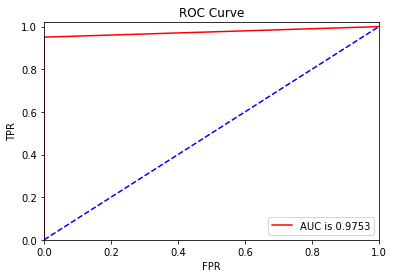

In [36]:
print("\n")
print("Please wait")
#model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=500)
#model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)

model.fit(img_train, lb_train)
pdlb_remain = model.predict(img_remain)
val_accuracy = model.score(img_remain, lb_remain) #remain contains the training and validation data
print("Training accuracy: {:.10f}%".format(val_accuracy * 100))
train_precision = precision_score(lb_remain, pdlb_remain)
print("Training precision:{:.10f}%".format(train_precision * 100))
train_recall = recall_score(lb_remain, pdlb_remain)
print("Training recall:{:.10f}%".format(train_recall * 100))
train_confu_matrix = confusion_matrix(lb_remain,pdlb_remain)
print("Training confusion matrix is:")
print(train_confu_matrix)

xaxis, yaxis, th = roc_curve(lb_remain, pdlb_remain)
aucroc = auc(xaxis, yaxis)

plt.title('ROC Curve')
plt.plot(xaxis, yaxis, 'r', label = 'AUC is %0.4f' % aucroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

The testing phrase:

Test accuracy: 95.6521739130%
Test precision:100.0000000000%
Test recall:88.8888888889%
Test confusion matrix is:
[[14  0]
 [ 1  8]]


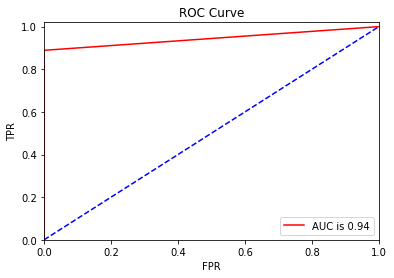

In [37]:
#Testing
test_accuracy = model.score(img_test, lb_test)
print("Test accuracy: {:.10f}%".format(test_accuracy * 100))
pdlb_test = model.predict(img_test)
test_precision = precision_score(lb_test, pdlb_test)
print("Test precision:{:.10f}%".format(test_precision * 100))
test_recall = recall_score(lb_test, pdlb_test)
print("Test recall:{:.10f}%".format(test_recall * 100))
test_confu_matrix = confusion_matrix(lb_test,pdlb_test)
print("Test confusion matrix is:")
print(test_confu_matrix)

fpr, tpr, th = roc_curve(lb_test, pdlb_test)
aucroc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'r', label = 'AUC is %0.4f' % aucroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Models and Result Analysis:
I have constructed 3 models, the paramters are set differently for penalty and solver algorithms.
The first model is the best model, when penalty is l2 (Ridge Regression) and solver is 'lbfgs'.
The second model is the second best model, when penalty is l2 and solver is 'liblinear'.
Then the last model is when penalty is l1 (Lasso Regression) and solver is 'liblinear'.
Note that l1 penalty cannot work with 'lbfgs'.

For the first model, it is shown when you run the code now and it works excellent.
When the penalty is l2, 'lbfgs' has the best performance, making the training accuracy nearly or exactly 100% while working with l2 penalty when all other paramters are default. There is only 1 or 0 misclassified samples, and the ROC curve is a stright or nearly straight horizontal line at y=1 because AUC is 1.00 or 0.99.

One example for 1st model training result:
Training accuracy: 99.5049504950%
Training precision:100.0000000000%
Training recall:98.7654320988%
Training confusion matrix is:
                   Actual
                   uniform Nonuniform
Predicted uniform  [[121         0]
       nonuniform  [  1        80]]

When the model is tested using testing set, the accuracy is usually 100% or nearly 100%.
One example for first model testing result:
Test accuracy: 100.0000000000%
Test precision:100.0000000000%
Test recall:100.0000000000%
Test confusion matrix is:
                   Actual
                   uniform Nonuniform
Predicted uniform  [[14           0]
       nonuniform  [ 0            9]]

For the 2nd model, it works the same result with the first model in training process.
But it is a little bit inaccurate for testing, there is one misclassified sample. And the testing result is as follows.
Test accuracy: 95.6521739130%
Test precision:100.0000000000%
Test recall:88.8888888889%
Test confusion matrix is:
                   Actual
                   uniform Nonuniform
Predicted uniform  [[14           0]
       nonuniform  [ 1            8]]

And the 3rd model is as follows.
The penalty is set to l1 using 'liblinear' solver, the accuracy is slightly lower for both training and testing. This result is shown as follows. As you can see, the model works better in training than testing, and overfitting could be the reason. But overall the accuracy is higher than 90%, which means the model is working fairly good.

Training accuracy: 96.0396039604%
Training precision:100.0000000000%
Training recall:90.1234567901%
Training confusion matrix is:
[[121   0]
 [  8  73]]

Test accuracy: 91.3043478261%
Test precision:100.0000000000%
Test recall:77.7777777778%
Test confusion matrix is:
[[14  0]
 [ 2  7]]


Conclusions:
Based on the result we got, the uniform illumination class is misclassified more often than the nonuniform class.
Even though model 1 is slightly better than model 2 for testing, their performances are basically the same because the dataset could be randomly divided again and the result could be similar.
L2 regularization works better than l1 regularization for this problem.
This problem of classifying uniform and nonuniform illuminated images could be really easy for logistic regression to solve. It is quite obvious to find the difference between the distribution of pixel values of uniform and nonuniform illuminated grayscaled images. That's why the performance are excellent (higher than 90% accuracy).


1.3 Multiclass classifier
Divide the dataset:
The basic idea and method are the same with data division for the previous binary classification.
There are 225 files in total, including 60 underexposed, 60 overexposed, 105 regular files.
Divide data into training:validation:testing=7:2:1
There are 157 training samples, 45 validation samples, and 23 testing samples.
Both training and validation samples are considered as training data.
Stratified sampling are used by using train_test_split, based on the label of the data samples.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

imagesb = np.array(images_mul)
labelsb = np.array(labels_mul)

(img_remain_b, img_test_b, lb_remain_b, lb_test_b) = train_test_split(imagesb, labelsb, stratify=labelsb, test_size=0.1)
(img_train_b, img_valid_b, lb_train_b, lb_valid_b) = train_test_split(img_remain_b, lb_remain_b, stratify=lb_remain_b, test_size=0.2222)

print(len(img_remain_b))
print(len(img_test_b))
print(len(img_train_b))
print(len(img_valid_b))

202
23
157
45


The training and validation:
I constructed 3 models, all use l2 penalty.
Model 1 uses 'newton-cg' solver algorithm for optimization and 'multinomial' for multi-class loss.
Model 2 uses 'lbfgs' solver algorithm for optimization and 'multinomial' for multi-class loss.
Model 3 uses 'liblinear' solver algorithm for optimization and 'ovr' for multi-class loss.

Process of training:
The training samples are fitted into the classifier, and then both training and validation samples are used for calculating the accuracy and confusion matrix.

In [27]:
print("\n")
print("Please wait")
#from model 1 to model 3
model = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=2000, multi_class='multinomial')
#model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000, multi_class='multinomial')
#model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000, multi_class='ovr') 
#model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, multi_class='ovr')

model.fit(img_train_b, lb_train_b)
pdlb_remain_b = model.predict(img_remain_b)
val_accuracy_b = model.score(img_remain_b, lb_remain_b) #remain contains the training and validation data
print("Training accuracy: {:.10f}%".format(val_accuracy_b * 100))
train_confu_matrix_b = confusion_matrix(lb_remain_b, pdlb_remain_b)
print("Training confusion matrix is:")
print(train_confu_matrix_b)



Please wait
Training accuracy: 100.0000000000%
Training confusion matrix is:
[[54  0  0]
 [ 0 54  0]
 [ 0  0 94]]


The testing phrase:

In [28]:
#Testing
test_accuracy_b = model.score(img_test_b, lb_test_b)
print("Test accuracy: {:.10f}%".format(test_accuracy_b * 100))
pdlb_test_b = model.predict(img_test_b)
test_confu_matrix_b = confusion_matrix(lb_test_b,pdlb_test_b)
print("Test confusion matrix is:")
print(test_confu_matrix_b)

Test accuracy: 100.0000000000%
Test confusion matrix is:
[[ 6  0  0]
 [ 0  6  0]
 [ 0  0 11]]


Models and Result Analysis:
All the models have a good performance. In the training process, these models perform really similar, with an accuracy of about 98%. But in testing, Model 1 and model 2 have similar performance, where testing accuracy is about 91%. and both of them perform better than model 3&4, whose accuracy is nearly 87%. The key difference between the model 1&2 and model 3&4 is that they use different loss function to do multi-classification.

For multi-class parameter, the multinomial loss means that "the loss minimised is the multinomial loss fit across the entire probability distribution"[1]. While 'ovr' loss means that 'one versus rest', which means that each class is compared with the remaining classes, thus becomes a binary classification problem.

In addition, all classifiers performs better in training than testing by 7% to 12%. The reason is the overfitting problem, when the model is fitted too well for the training data. Then it becomes not general enough to perform that well using testing set.

Model 1 uses 'newton-cg' solver algorithm for dealing with multinomial loss. The example is shown below.

Training accuracy: 98.5148514851%
Training confusion matrix is:
                  Actual
                  Under Over Regular
Predicted Under  [[51    0     3]
           Over   [ 0    54    0]
         Regular  [ 0    0    94]]

Test accuracy: 91.3043478261%
Test confusion matrix is:
                  Actual
                  Under Over Regular
Predicted Under  [[ 5    0     1]
           Over   [ 0    5     1]
         Regular  [ 0    0    11]]

Model 2 uses 'lbfgs' solver algorithm for dealing with multinomial loss. The example is shown below.
Training accuracy: 98.5148514851%
Training confusion matrix is:
                  Actual
                  Under Over Regular
Predicted Under   [[51   0    3]
          Over     [ 0   54   0]
        Regular    [ 0   0   94]]

Test accuracy: 91.3043478261%
Test confusion matrix is:
                  Actual
                  Under Over Regular
Predicted Under   [[ 5   0    1]
          Over     [ 0   5    1]
        Regular    [ 0   0   11]]

Model 3 uses 'lbfgs' solver. But for multiclass loss, it uses 'ovr' loss. Compared with model 2 which uses the same solver, model 3 perform worse than model 2 probably because the multi-class loss function is different. 
Training accuracy: 98.0198019802%
Training confusion matrix is:
[[51  0  3]
 [ 0 54  0]
 [ 1  0 93]]
 
Test accuracy: 86.9565217391%
Test confusion matrix is:
[[ 5  0  1]
 [ 0  5  1]
 [ 1  0 10]]

Model 4 uses 'liblinear' solver algorithm for dealing with 'ovr' loss. The example is shown below.
Training accuracy: 98.0198019802%
Training confusion matrix is:
 [[53   0  1]
  [0   53  1]
  [0    2 92]]

Test accuracy: 86.956521739%
Test confusion matrix is:
[[ 5  0  1]
 [ 0  5  1]
 [ 0  1 10]]

Conclusion:
Based on the result, I find that regular class images are most likely to be misclassified. This is probably because that nonuniform illuminated images are classified as regular class images as well, which may caused the confusion.
Compare the result obtained between the classifiers that implement 'multinomial' and 'ovr' loss, it is obvious that 'multinomial' works better than 'ovr' loss for this problem. Classifier 1&2 have testing accuracy of 91%, while classifier 3&4 have 86%. This is probably because in 'ovr' loss, the multi-classification problem is somehow converted into binary problem, which makes the performance worse in testing.
This problem of classifying underexposed, overexposed and regular images could be not difficult for logistic regression, because the lowest testing accuracy is more than 86%. The difference of the distribution of pixel values of these three classes are easy to find.


For the bonus, perform the multi-class regression of Section 1.3 but with colour images and try to
improve the results further. Use an overexposed, an underexposed and a correctly exposed image
not in the Phos2 0 2MP dataset and have it classified by your model from Section 1.3. Disuss the
result. Make sure to discuss your improvements in the Jupyter notebook markup: No discussion,
no bonus marks. Hint: Consider the classical computer vision pipeline. 

1.4 For color multiclass classification
The method of data preprocessing, data division, training and testing are almost the same with 1.3 grayscale multiclass classification, except that the images are not converted into grayscale in image preprocessing.

In [29]:
#divide the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

imagesb = np.array(images_col)
labelsb = np.array(labels_col)

(img_remain_b, img_test_b, lb_remain_b, lb_test_b) = train_test_split(imagesb, labelsb, stratify=labelsb, test_size=0.1)
(img_train_b, img_valid_b, lb_train_b, lb_valid_b) = train_test_split(img_remain_b, lb_remain_b, stratify=lb_remain_b, test_size=0.2222)

print(len(img_remain_b))
print(len(img_test_b))
print(len(img_train_b))
print(len(img_valid_b))

202
23
157
45


The training process:

In [30]:
print("\n")
print("Please wait")
#from model 1 to model 3
#model = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=2000, multi_class='multinomial')
#model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=4000, multi_class='multinomial')
#model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000, multi_class='ovr') 
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, multi_class='ovr')

model.fit(img_train_b, lb_train_b)
pdlb_remain_b = model.predict(img_remain_b)
val_accuracy_b = model.score(img_remain_b, lb_remain_b) #remain contains the training and validation data
print("Training accuracy: {:.10f}%".format(val_accuracy_b * 100))
train_confu_matrix_b = confusion_matrix(lb_remain_b, pdlb_remain_b)
print("Training confusion matrix is:")
print(train_confu_matrix_b)



Please wait
Training accuracy: 95.5445544554%
Training confusion matrix is:
[[52  0  2]
 [ 1 51  2]
 [ 2  2 90]]


The testing process:

In [31]:
#Testing
test_accuracy_b = model.score(img_test_b, lb_test_b)
print("Test accuracy: {:.10f}%".format(test_accuracy_b * 100))
pdlb_test_b = model.predict(img_test_b)
test_confu_matrix_b = confusion_matrix(lb_test_b,pdlb_test_b)
print("Test confusion matrix is:")
print(test_confu_matrix_b)

Test accuracy: 91.3043478261%
Test confusion matrix is:
[[ 6  0  0]
 [ 0  5  1]
 [ 1  0 10]]


What I did for color image multiclass classification:
The only difference is that the input is color image rather than grayscaled image.
And I used the same 4 sklearn Logistic Regression models from 1.3 gray scaled image classification.

DISCUSSION FOR COLOR IMAGE MULTICLASS CLASSIFICATION
The running time for training of color image classification is much slower than grayscaled images.
But the performance of color input is better than the grayscaled one.

The 1st model which implements 'newton-cg' solver with 'motinomial' loss has achieved accuracy of 100% in training, and also 100% in testing. It is better than the grayscaled image multi-classification using the same model, which gives 98% accuracy in training, 91% in testing. This is probably because that color input values provides much more detail regarding the illumination condition compared with grayscaled images.
One example of 1st model is shown below.
Models and Result Analysis:
Training accuracy: 100.0000000000%
Training confusion matrix is:
                  Actual
                  Under Over Regu
Predicted Under [[54    0    0]
           Over [ 0    54    0]
           Regu [ 0     0   94]]

Test accuracy: 100.0000000000%
Test confusion matrix is:
[[ 6  0  0]
 [ 0  6  0]
 [ 0  0 11]]
 
Model 2, which uses 'lbfgs' optimization and 'motinomial' loss also achieved 100% training accuracy and 100% testing accuracy. 
 
Both model 3 and model 4 use 'ovr' loss, and both of them perform excellent for training with 99% and 97% training accuracy respectively, but comparatively worse for testing. The testing accuracy is only 86% for model 3, and it is only 82% for model 4.

Apparently model 3 and model 4 suffer from overfitting problem because the training accuracy is higher than the testing accuracy by 13% and 15% respectively.

And the difference between model 3 and model 4 is the solver algorithm. Model 3 uses 'lbfgs' which is better than 'liblinear' used in model 4.

The model 3 result is:
Training accuracy: 99.0099009901%
Training confusion matrix is:
[[53  0  1]
 [ 0 54  0]
 [ 1  0 93]]

Test accuracy: 86.9565217391%
Test confusion matrix is:
[[6 0 0]
 [0 6 0]
 [3 0 8]]
 

Model 4 result is:
Training accuracy: 97.5247524752%
Training confusion matrix is:
 [[52  0  2]
 [ 0 53  1]
 [ 1  1 92]]
 
Test accuracy: 82.6086956522%
Test confusion matrix is:
[[6 0 0]
 [0 6 0]
 [3 1 7]]
 
 
Finding: Based on all the result, there is no class that are more easily confused in the case of color image multi-classification. This is because that the color input values provides more diversed and detailed info for the illumination condition.

Overall, the color image classification is better than grayscaled image classification for Logistic Regression model with motinomial loss function in sci-kit learn. And this classification problem is easy for logistic regression to solve. But color input values are larger than grayscaled, so that there is a tradeoff between time and accuracy.

Reference:
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python